# Welcome to Measures of Spread: Variance, Standard Deviation, and IQR

- Understanding how data varies is key in statistics. Today, we will explore three main tools: variance, standard deviation, and the interquartile range (IQR).



In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Data setup, Load the titanic dataset
titanic = sns.load_dataset('titanic')
print('Titanic dataset shape', titanic.shape)
titanic.head()


Titanic dataset shape (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# What is Spread in Data?
Spread tells us how much the values in our data differ from each other.

- Variance shows the average squared distance from the mean.

- Standard deviation is the square root of variance. It feels like the 'average distance' from the mean.

- IQR stands for Interquartile Range. It is the middle 50% of your data.

We use these to judge predictability and fairness—like in sports stats or test scores!

In [7]:
# Let us look at 'age' column: drop NA for simplicity
ages = titanic['age'].dropna()
print('Number of age values:', len(ages))
print(ages.head())

Number of age values: 714
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


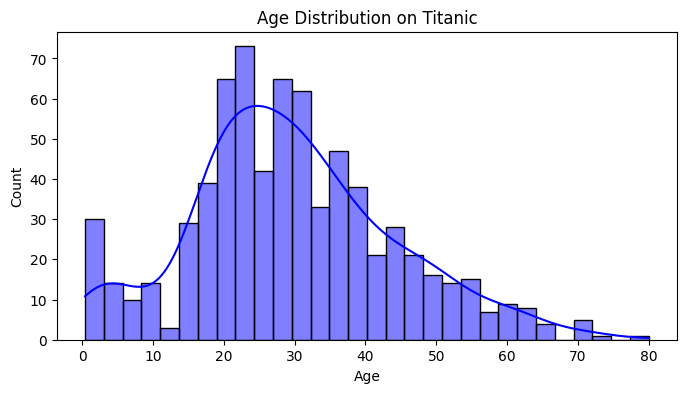

In [8]:
# Visualizing age distribution
plt.figure(figsize=(8,4))
sns.histplot(ages, bins=30, kde=True, color='blue')
plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Calculating Variance By Hand

Variance measures average squared distance from the mean.

Steps:

1. Find the mean.
2. Subtract the mean from each value and square the result.
3. Average those squared differences.

Let us try this on a tiny example before we automate!

In [9]:
# Demo: variance step by step for ages 10, 22, 30, 40, 50
demo_ages = [10, 22, 30, 40, 50]
mean_demo = np.mean(demo_ages)
print('Mean age:', mean_demo)

squared_diffs = [(x - mean_demo) ** 2 for x in demo_ages]
print('Squared differences:', squared_diffs)

variance_demo = np.mean(squared_diffs)
print('Variance:', variance_demo)

Mean age: 30.4
Squared differences: [np.float64(416.15999999999997), np.float64(70.55999999999997), np.float64(0.15999999999999887), np.float64(92.16000000000003), np.float64(384.1600000000001)]
Variance: 192.64000000000001


In [10]:
# Standard deviation is just the square root of variance
std_demo = np.sqrt(variance_demo)
print('Standard deviation:', std_demo)

Standard deviation: 13.879481258317979


In [11]:
# Calculating with pandas for real Titanic data
titanic_age_var = ages.var(ddof=0)
titanic_age_std = ages.std(ddof=0)
print('Titanic Age Variance:', titanic_age_var)
print('Titanic Age Standard Deviation:', titanic_age_std)

Titanic Age Variance: 210.72357975366617
Titanic Age Standard Deviation: 14.516321150817316


# Why Is Standard Deviation Useful?

- If the standard deviation is small, ages are all close together.
- If it is large, there is a big age mix.

In real life, standard deviation tells us whether test scores 
or incomes are similar or very different in a group.

In [12]:
# Compare two groups: Survivors vs Non-survivors' age spread
survived_ages = titanic[titanic['survived'] == 1]['age'].dropna()
not_survived_ages = titanic[titanic['survived'] == 0]['age'].dropna()

print('Survivors std:', survived_ages.std(ddof=0))
print('Non-survivors std:', not_survived_ages.std(ddof=0))

Survivors std: 14.925152220337246
Non-survivors std: 14.155387617772274


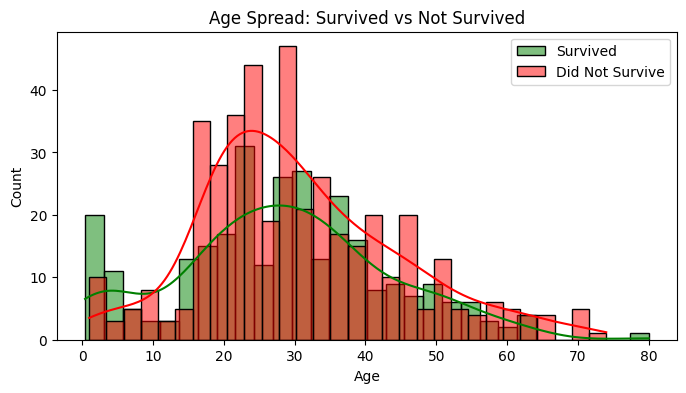

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(survived_ages, bins=30, color='green', kde=True, label='Survived', alpha=0.5)
sns.histplot(not_survived_ages, bins=30, color='red', kde=True, label='Did Not Survive', alpha=0.5)
plt.legend()
plt.title('Age Spread: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# The Interquartile Range (IQR)

IQR is the range between the 25th and 75th percentile.
 - It covers the middle half of your data.
 - Less affected by outliers or extreme values than standard deviation.

# Let us use IQR to see age concentration among Titanic passengers.

In [14]:
# Calculate IQR by hand and with pandas
q1 = ages.quantile(0.25)
q3 = ages.quantile(0.75)
iqr = q3 - q1
print('25th percentile (Q1):', q1)
print('75th percentile (Q3):', q3)
print('Interquartile Range (IQR):', iqr)

25th percentile (Q1): 20.125
75th percentile (Q3): 38.0
Interquartile Range (IQR): 17.875


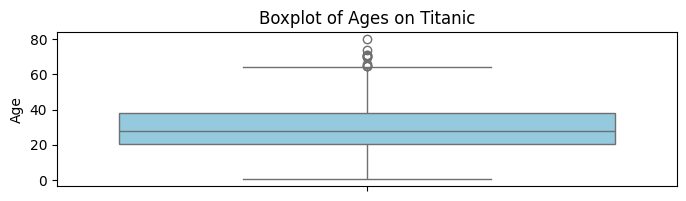

In [15]:
# Visualize age spread with a boxplot to show IQR and outliers
plt.figure(figsize=(8,2))
sns.boxplot(y=ages, color='skyblue')
plt.title('Boxplot of Ages on Titanic')
plt.ylabel('Age')
plt.show()

In [16]:
# Compare spread with and without outliers: add some fake ages
ages_extended = pd.concat([ages, pd.Series([5, 7, 8, 99, 100, 101])], ignore_index=True)
print('Original std:', ages.std(ddof=0))
print('With outliers std:', ages_extended.std(ddof=0))
print('Original IQR:', ages.quantile(0.75) - ages.quantile(0.25))
print('With outliers IQR:', ages_extended.quantile(0.75) - ages_extended.quantile(0.25))

Original std: 14.516321150817316
With outliers std: 15.22304071394775
Original IQR: 17.875
With outliers IQR: 18.25


In [17]:
# Practice: Calculate variance, standard deviation, and IQR for 'fare' prices
fares = titanic['fare'].dropna()
print('Fare variance:', fares.var(ddof=0))
print('Fare std:', fares.std(ddof=0))
print('Fare IQR:', fares.quantile(0.75) - fares.quantile(0.25))

Fare variance: 2466.665311685043
Fare std: 49.6655344447741
Fare IQR: 23.0896


# Choosing a Measure of Spread

- Use standard deviation when your data does not have big outliers.
- Use IQR when you expect outliers or a skewed shape.

Always look at plots and more than one summary for best insight!

 Ready for a quick test of your know-how?

In [21]:
# Challenge: Enter three numbers and get std and IQR back
nums = []
for i in range(3):
    value = float(input("Enter any number: "))
    nums.append(value)

series = pd.Series(nums)
print('Standard deviation:', series.std(ddof=0))
print('Interquartile range:', series.quantile(0.75) - series.quantile(0.25))

Standard deviation: 102.08928554075702
Interquartile range: 125.0


# Recap: Variance, Standard Deviation, and IQR

- Variance shows how widely data values scatter, using squares.  
- Standard deviation makes this easier to read and compare.  
- IQR helps spot the middle range, less affected by unusually high or low values.

Combine these for a full view of any dataset.